In [97]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [98]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.pipeline import Pipeline

In [99]:
### Creating the dataset
x = 6 * np.random.rand(100, 1) - 2  
y = 0.5 * x**2 + x + 2 + np.random.randn(100, 1)

Text(0.5, 1.0, 'Dataset')

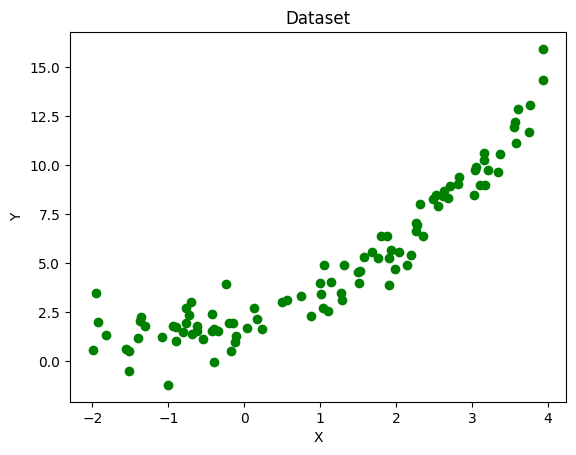

In [100]:
## Visualizing the dataset
plt.scatter(x, y, color='g')
plt.xlabel('X') 
plt.ylabel('Y')
plt.title('Dataset')

0.9390455916317992


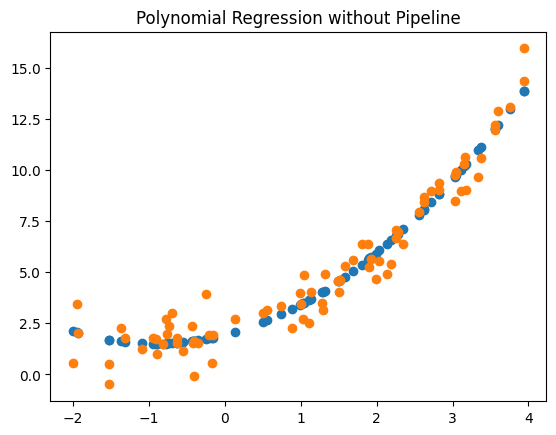

In [104]:
def poly_reg1(degree, x, y):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

    poly1 = PolynomialFeatures(degree=degree, include_bias=True)
    lng_reg = LinearRegression()
    x_train_poly = poly1.fit_transform(x_train)
    x_test_poly = poly1.transform(x_test)

    lng_reg.fit(x_train_poly, y_train)
    y_pred = lng_reg.predict(x_test_poly)
    score = r2_score(y_test, y_pred)
    print(score)

    plt.scatter(x_train, lng_reg.predict(x_train_poly))
    plt.scatter(x_train, y_train)
    plt.title("Polynomial Regression without Pipeline")

poly_reg1(2, x, y)

In [105]:
def poly_regression(degree, x, y):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
    
    poly_regression = Pipeline([
        ("poly_features", PolynomialFeatures(degree=degree, include_bias=True)),
        ("lin_reg", LinearRegression())
    ]) 
    poly_regression.fit(x_train, y_train)  # Polynomial and fit of linear regression
    y_pred = poly_regression.predict(x_test)
    
    # Calculate r2_score
    score = r2_score(y_test, y_pred)
    print(f"R2 Score: {score}")

    # Plotting prediction line
    plt.scatter(x_train, y_train, c='orange', label='Training data')
    plt.scatter(x_train, poly_regression.predict(x_train), c='teal', label='Prediction', linewidth=2)
    plt.legend(loc="upper left")
    plt.xlabel("X")
    plt.ylabel("y")
    plt.title(f"Polynomial Regression with degree {degree}")
    plt.show()
    

R2 Score: 0.9390455916317992


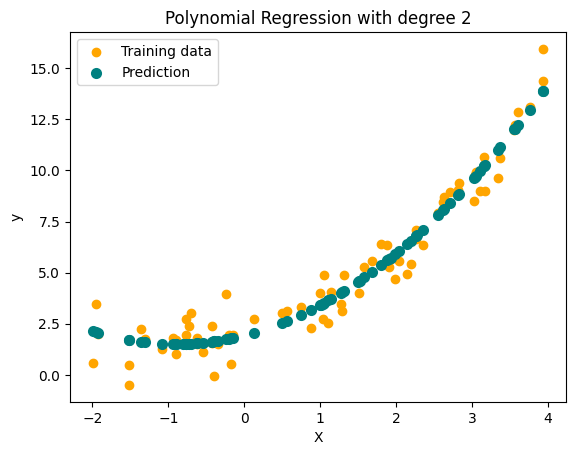

In [106]:
poly_regression(2, x, y)